C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

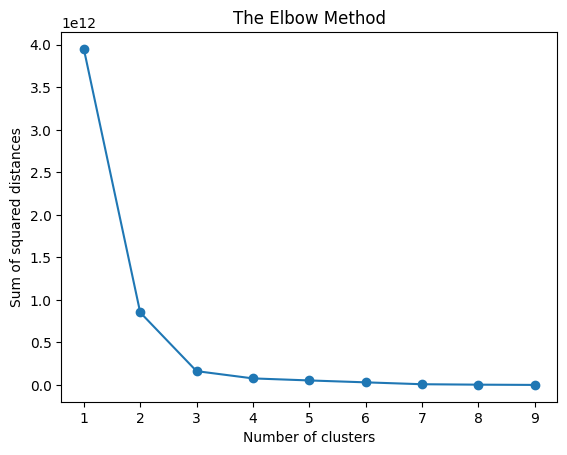

In [1]:
######################################################################################################## 
#use the Elbow Method to identify the optimal number of clusters where the SSD reduction rate decreases
########################################################################################################
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given data
# values represents the quantities of each class in the dataset
# the occl_empty is quantified after applying the random sampling with 2:1 ratio during the preprocessing part following Song's method
data = {
    'ID': ["occl_empty", "ceil.", "floor", "wall", "wind.", "chair", "bed", "sofa", "table", "tvs", "furn.", "objs."],
    'Value': [1575439.0, 78840.0, 1048951.0, 872760.0, 112356.0, 179638.0, 435114.0, 280514.0, 253275.0, 28160.0, 1786352.0, 845738.0]
}
df = pd.DataFrame(data)

# Compute the sum of squared distances
ssd = []
range_n_clusters = list(range(1,10))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state = 42)
    kmeans.fit(df[['Value']])
    ssd.append(kmeans.inertia_)

# Plot the SSDs for each number of clusters
plt.plot(range_n_clusters, ssd, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\verim\anaconda3\envs\env2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

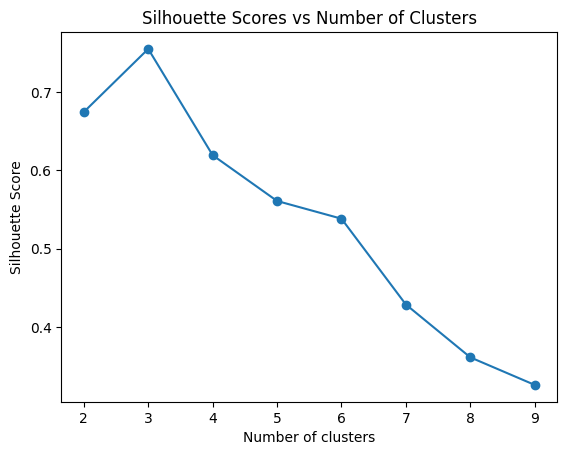

In [2]:
################################################use the silhouette score to find the optimal number of clusters ##############
###########################################################################################################################
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Given data
data = {
    'ID': ["occl_empty", "ceil.", "floor", "wall", "wind.", "chair", "bed", "sofa", "table", "tvs", "furn.", "objs."],
    'Value': [1575439.0, 78840.0, 1048951.0, 872760.0, 112356.0, 179638.0, 435114.0, 280514.0, 253275.0, 28160.0, 1786352.0, 845738.0]
}
df = pd.DataFrame(data)

# Compute silhouette scores
sil_scores = []
range_n_clusters = list(range(2,10))  # Starting from 2 because silhouette score isn't defined for 1 cluster
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['Value']])
    silhouette_avg = silhouette_score(df[['Value']], cluster_labels)
    sil_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range_n_clusters, sil_scores, '-o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


            ID      Value  Cluster  Weight
0   occl_empty  1575439.0        0       1
1        furn.  1786352.0        0       1
2        ceil.    78840.0        1       3
3        wind.   112356.0        1       3
4        chair   179638.0        1       3
5          bed   435114.0        1       3
6         sofa   280514.0        1       3
7        table   253275.0        1       3
8          tvs    28160.0        1       3
9        floor  1048951.0        2       2
10        wall   872760.0        2       2
11       objs.   845738.0        2       2


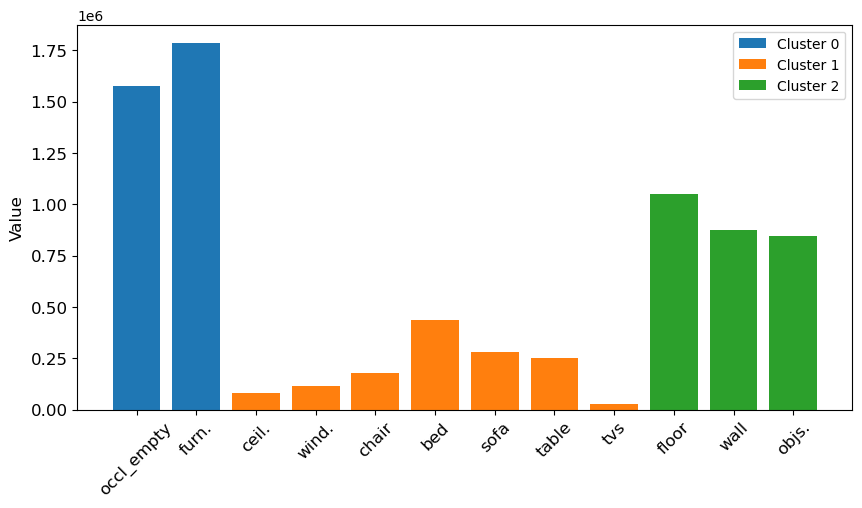

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Given data
data = {
    'ID': ["occl_empty", "ceil.", "floor", "wall", "wind.", "chair", "bed", "sofa", "table", "tvs", "furn.", "objs."],
    'Value': [1575439.0, 78840.0, 1048951.0, 872760.0, 112356.0, 179638.0, 435114.0, 280514.0, 253275.0, 28160.0, 1786352.0, 845738.0]
}
df = pd.DataFrame(data)

# KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Value']])

# get average value for each cluster
cluster_avg = df.groupby('Cluster')['Value'].mean().sort_values().reset_index()

# assign weights based on the rank of average value
max_weight = len(cluster_avg)
cluster_avg['Weight'] = range(max_weight, 0, -1)


df = pd.merge(df, cluster_avg[['Cluster', 'Weight']], on='Cluster')
print(df)


plt.figure(figsize=(10, 5))
for cluster in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster]
    plt.bar(subset['ID'], subset['Value'], label=f"Cluster {cluster}")

plt.ylabel('Value',fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()
